In [11]:
import cv2
import numpy as np
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synthetic Shapes - Photometric and Homographic data augmentation

In [12]:
config = {
    'on-the-fly': True,
    'preprocessing': {
        'resize': [120, 160],
        'blur_size': 21,
    },
    'augmentation' : {
        'photometric': {
            'enable': True,
            'primitives': [
                'random_brightness', 'random_contrast', 'additive_speckle_noise',
                'additive_gaussian_noise', 'additive_shade', 'motion_blur'],
            'params': {
                'random_brightness': {'max_abs_change': 75},
                'random_contrast': {'strength_range': [0.3, 1.8]},
                'additive_gaussian_noise': {'stddev_range': [0, 15]},
                'additive_speckle_noise': {'prob_range': [0, 0.0035]},
                'additive_shade': {'transparency_range': [-.5, .8], 'kernel_size_range': [50, 100]},
                'motion_blur': {'max_kernel_size': 7},
            }
        },
        'homographic': {
            'enable': True,
            'params': {
                'translation': True,
                'rotation': True,
                'scaling': True,
                'perspective': True,
                'scaling_amplitude': 0.2,
                'perspective_amplitude_x': 0.2,
                'perspective_amplitude_y': 0.2,
                'patch_ratio': 0.8,
                'max_angle': 1.57,
                'allow_artifacts': True,
                'translation_overflow': 0.05,
            },
            'valid_border_margin': 3,
        },
        'distortion':{
            'enable': True,
            'valid_border_margin': 3,
        }
    }
}
dataset = SyntheticShapes(**config)
data = dataset.get_training_set()

In [13]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)
def draw_overlay(img, mask, color=[0, 0, 255], op=0.5):
    img[np.where(mask)] = img[np.where(mask)]*(1-op) + np.array(color)*op
def display(d):
    #print(np.where(d['keypoint_map']))
    img = draw_keypoints(d['image'][..., 0]*255, np.where(d['keypoint_map']), (0, 255, 0))
    draw_overlay(img, np.logical_not(d['valid_mask']))
    return img

(array([ 0,  3, 23], dtype=int64), array([62, 92, 69], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([  0,  14,  21,  26,  31,  37,  44,  51,  58,  59,  68,  76,  84,
        93,  94, 102, 112], dtype=int64), array([ 25, 104,  74,  43,   9, 122,  91,  61,  28, 144, 112,  80,  48,
       136,  12, 102,  69], dtype=int64))
(array([52, 59, 59, 62], dtype=int64), array([33, 43, 51, 36], dtype=int64))
(array([  1,   2,   3,   4,   4,  21,  25,  29,  33,  37,  41,  41,  46,
        52,  58,  60,  66,  66,  74,  76,  78,  83,  86,  93,  95, 106,
       109], dtype=int64), array([ 25, 137,  44,  67,  96,  13,  29,  47,  69,  97,  16, 136,  31,
        49,  71,  18,  33,  98,  51, 136,  20,  72,  35,  99,  52,  73,
       137], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([  5,  14,  14,  18,  26,  33,  37,  37,  46,  51,  54,  55,  60,
        66,  70,  71,  71,  87,  87,  88,  88, 104, 105, 107], dtype=int64), array([ 80,  27, 113, 142,  70, 10

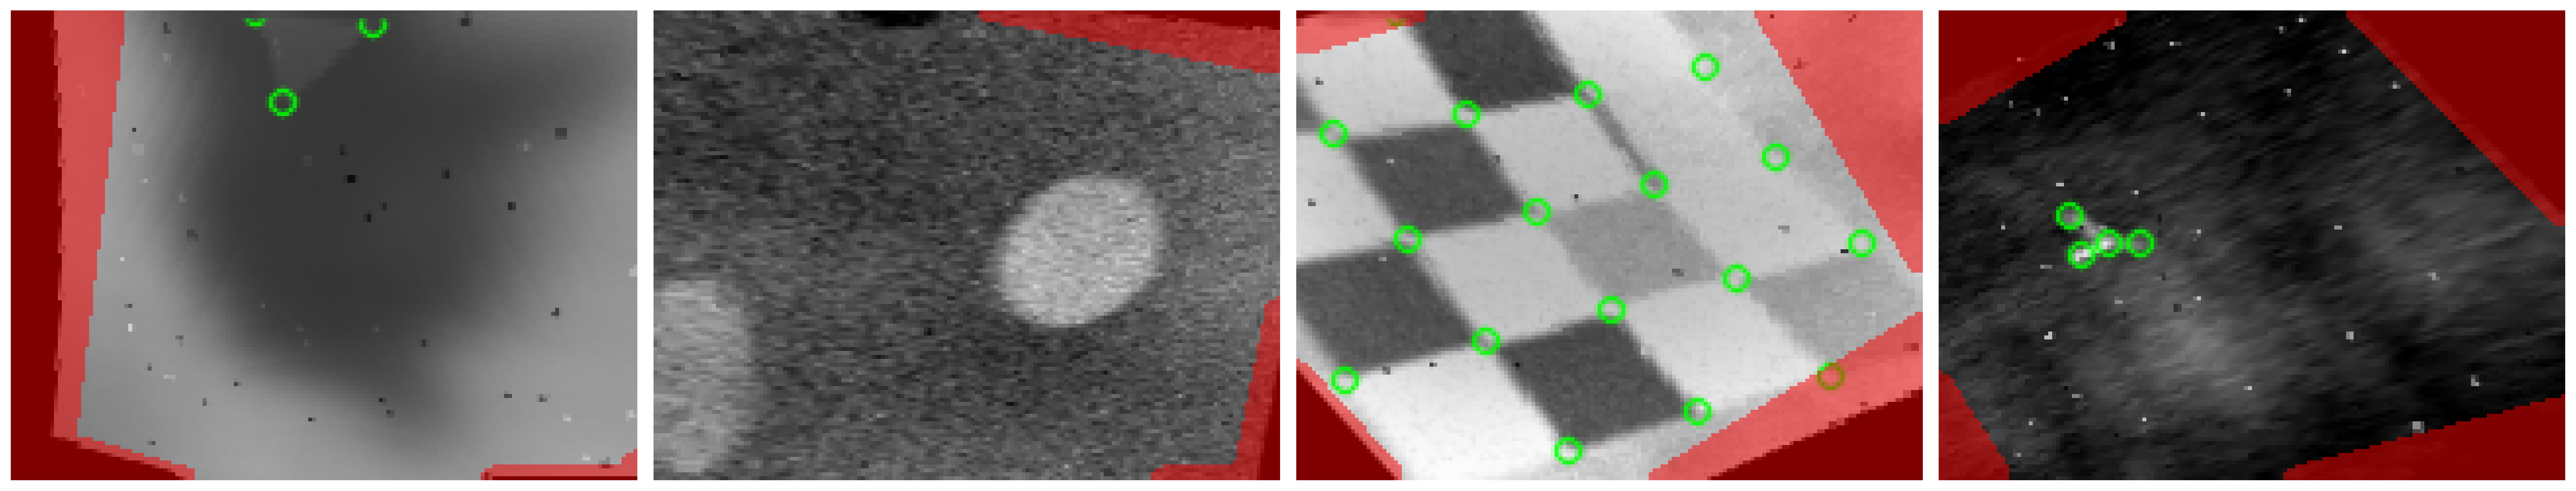

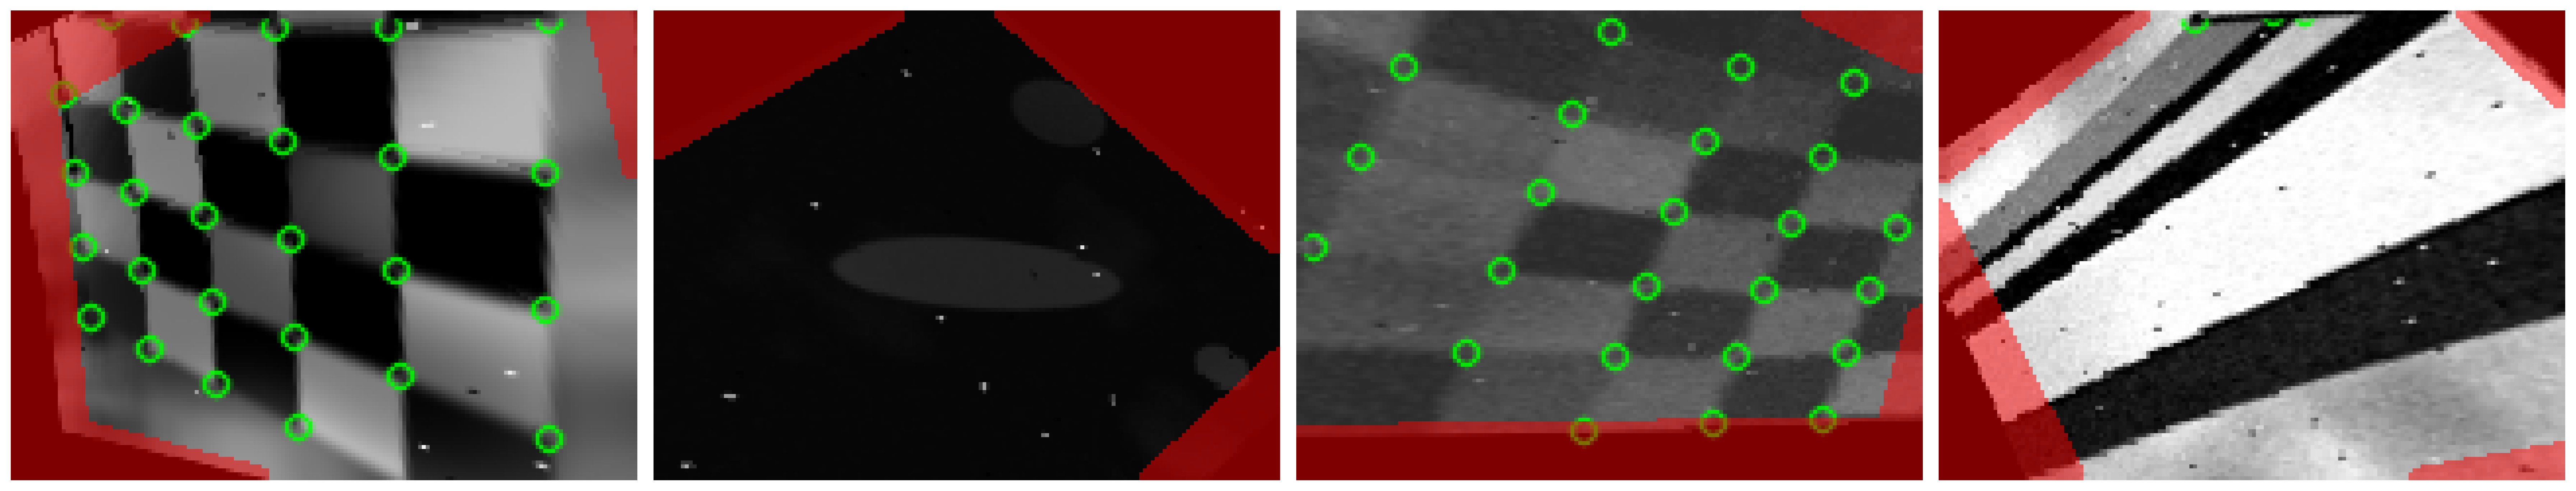

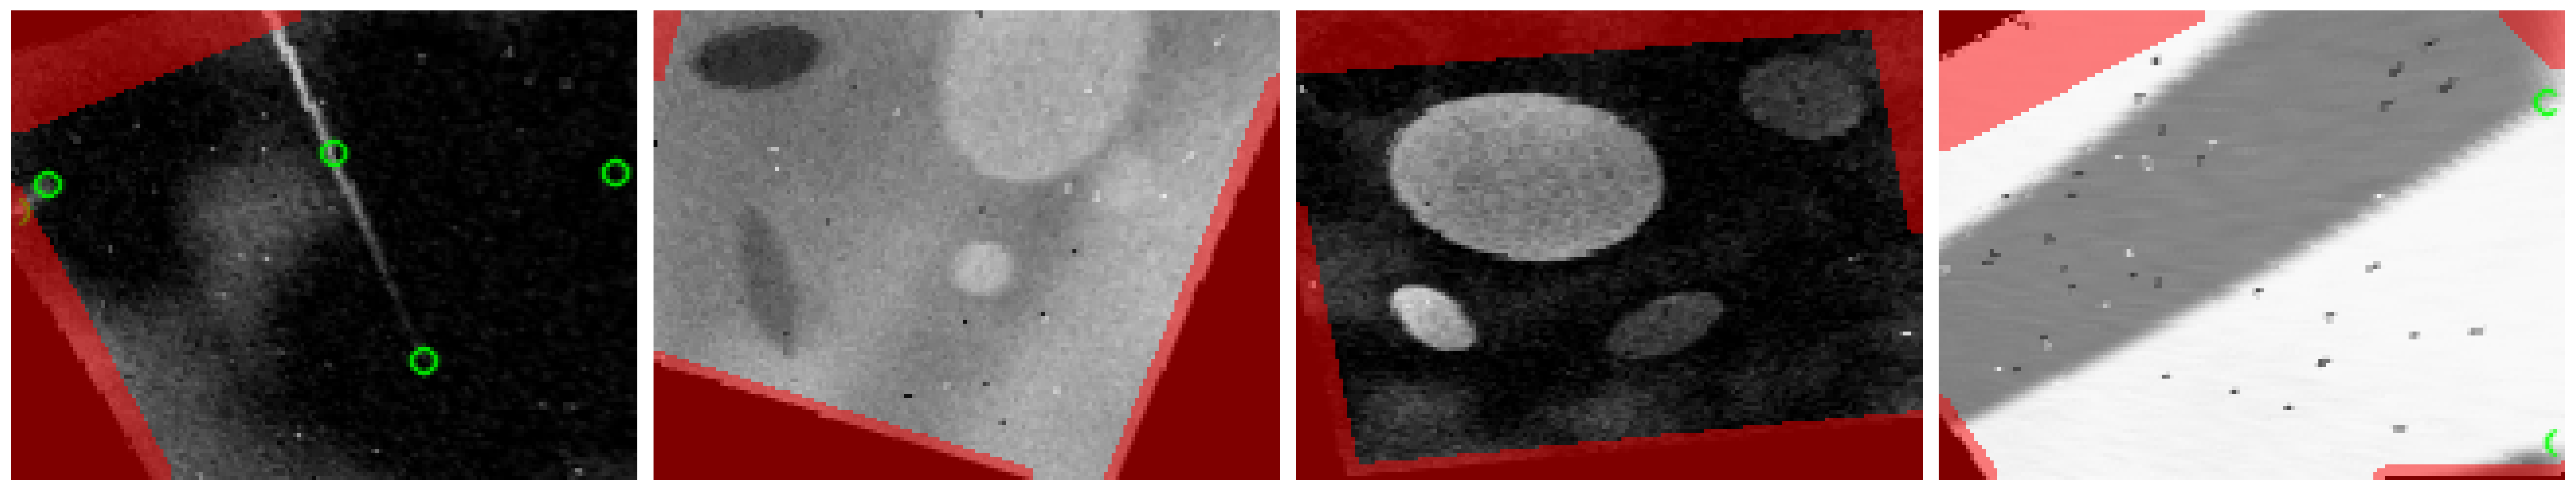

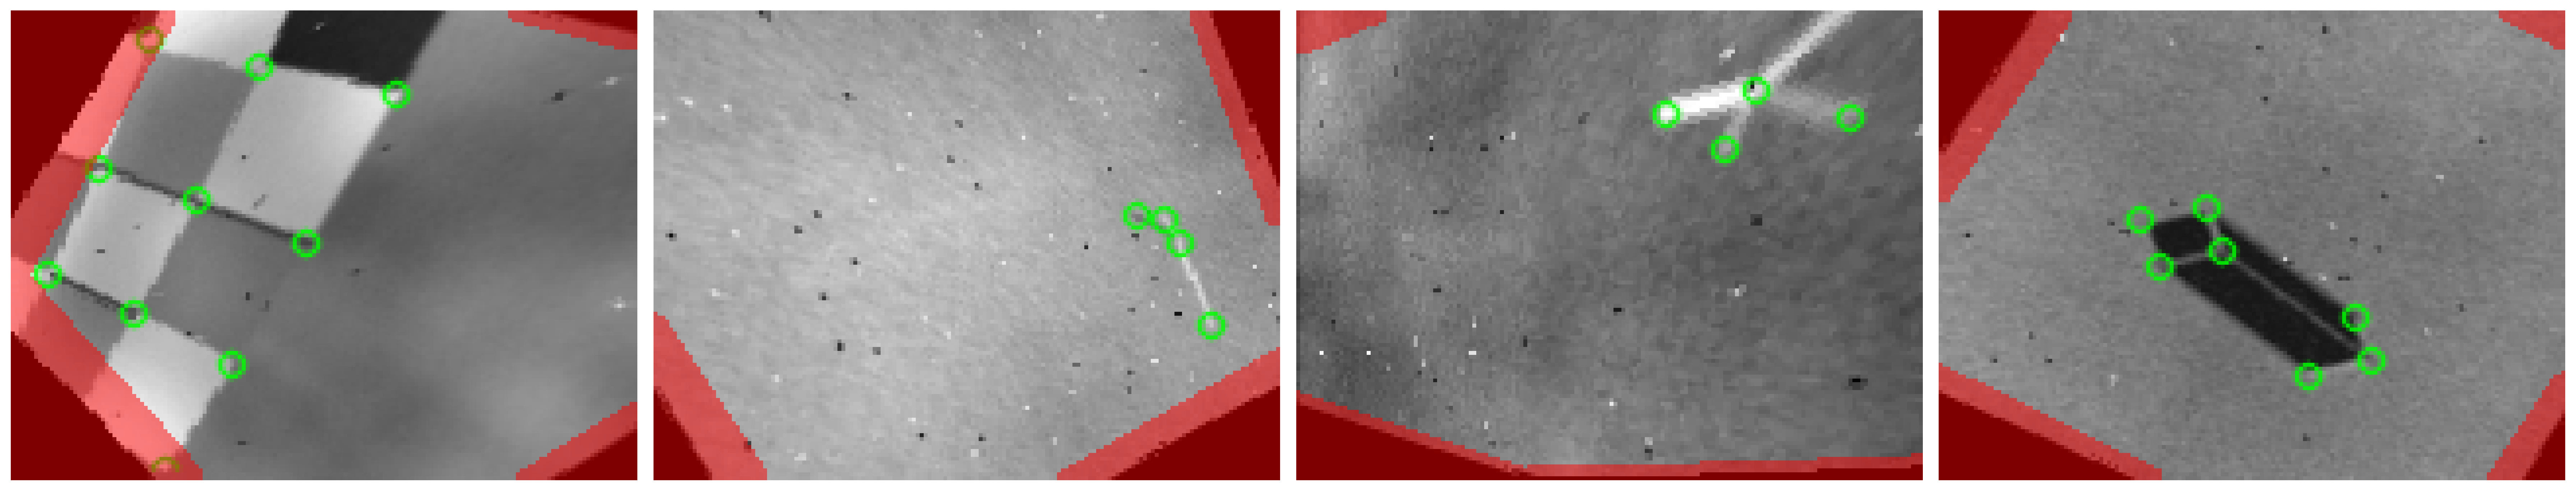

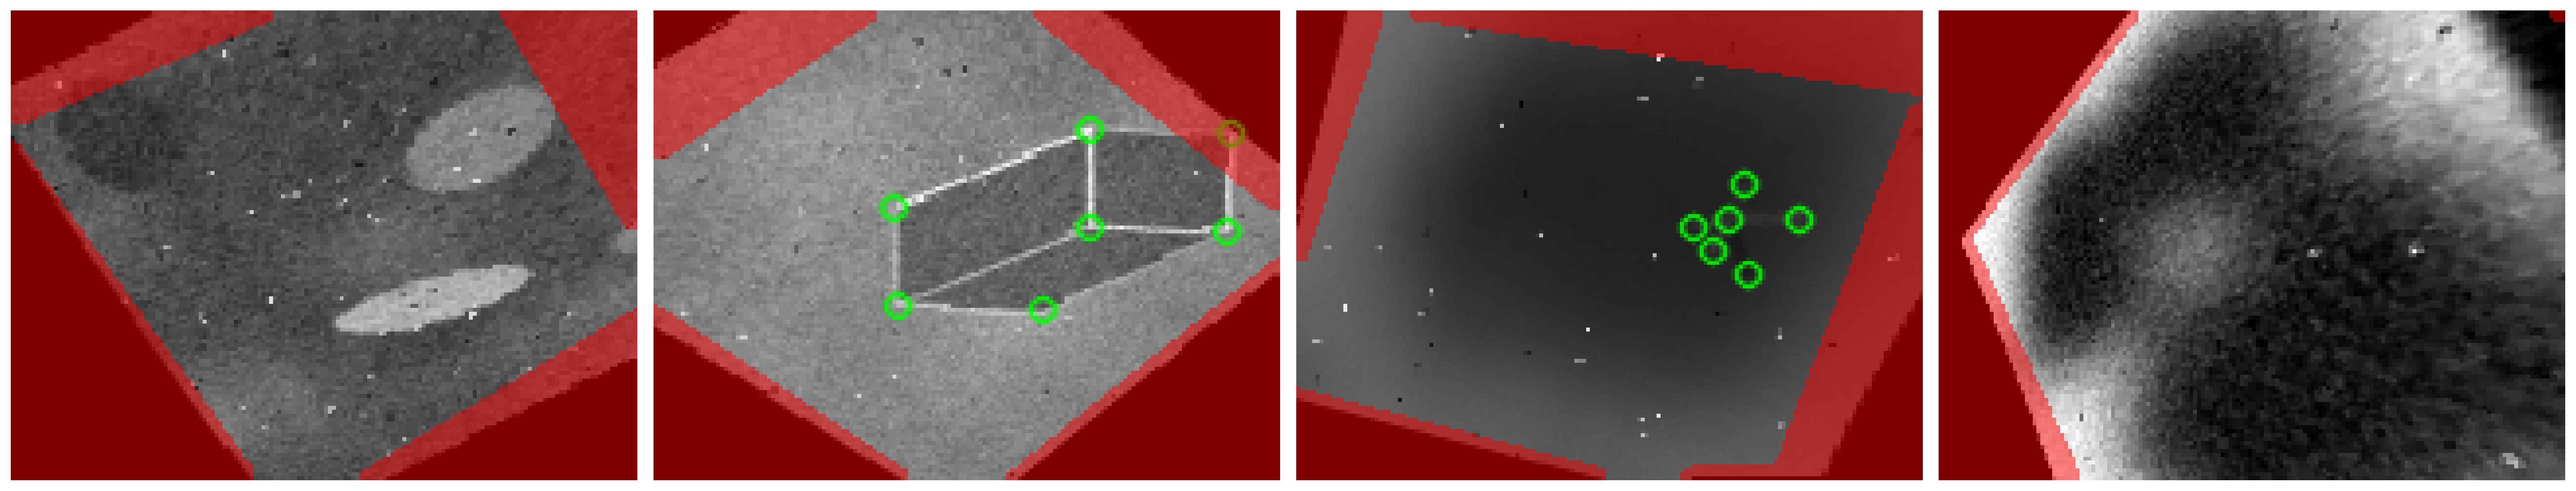

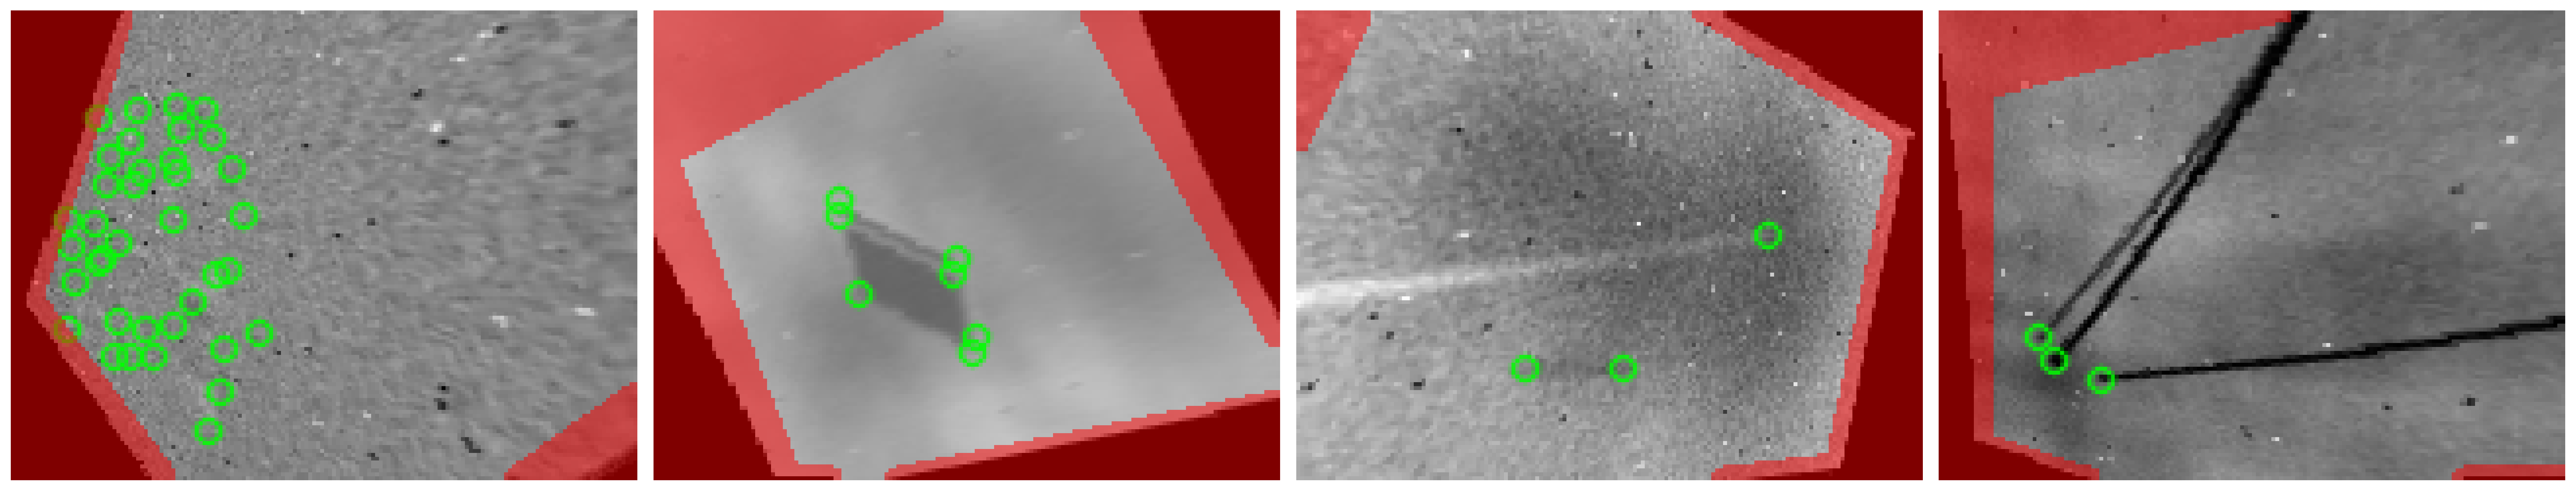

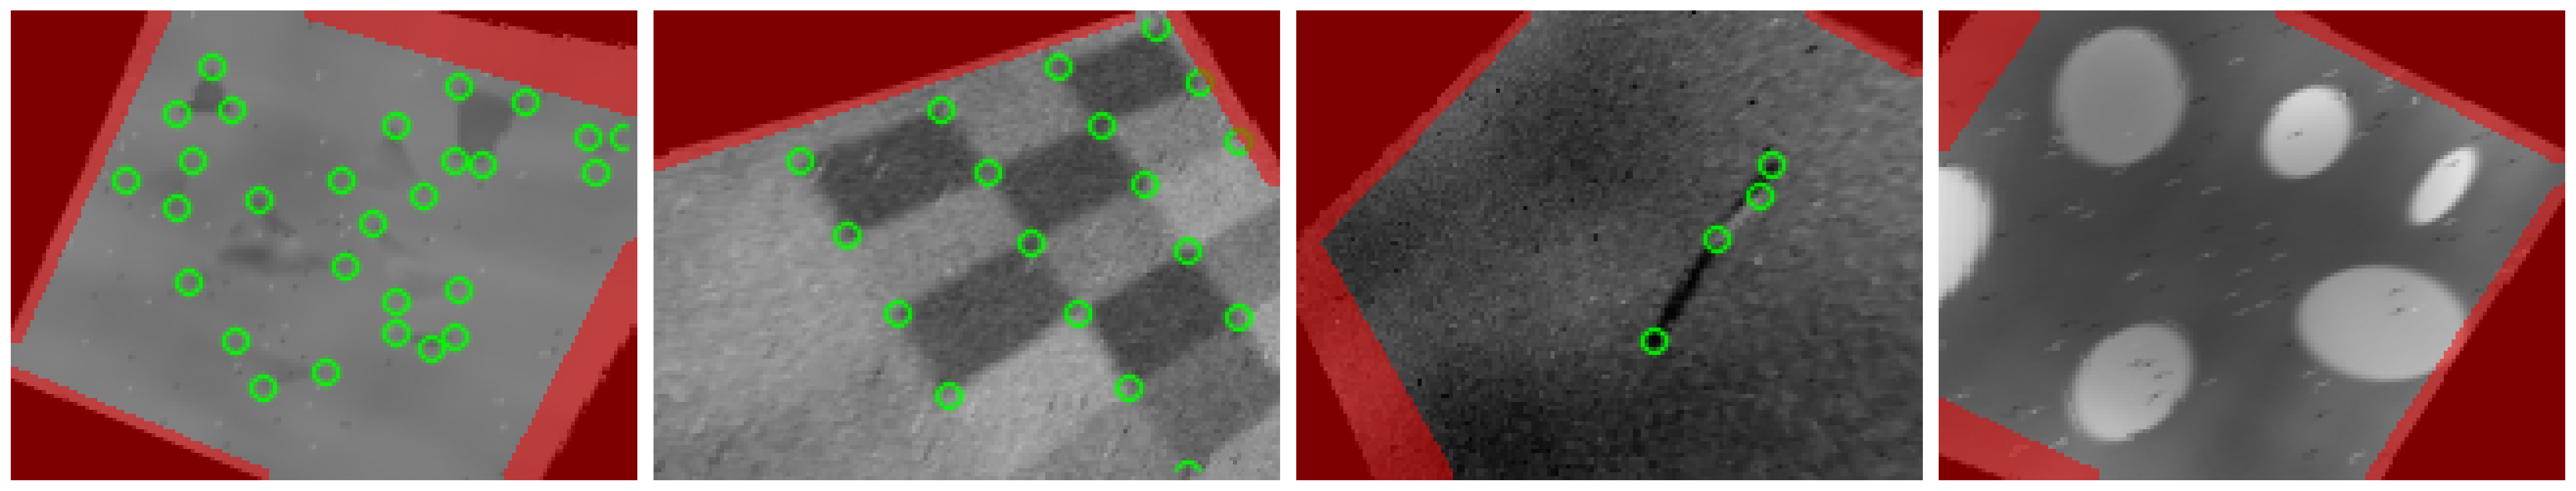

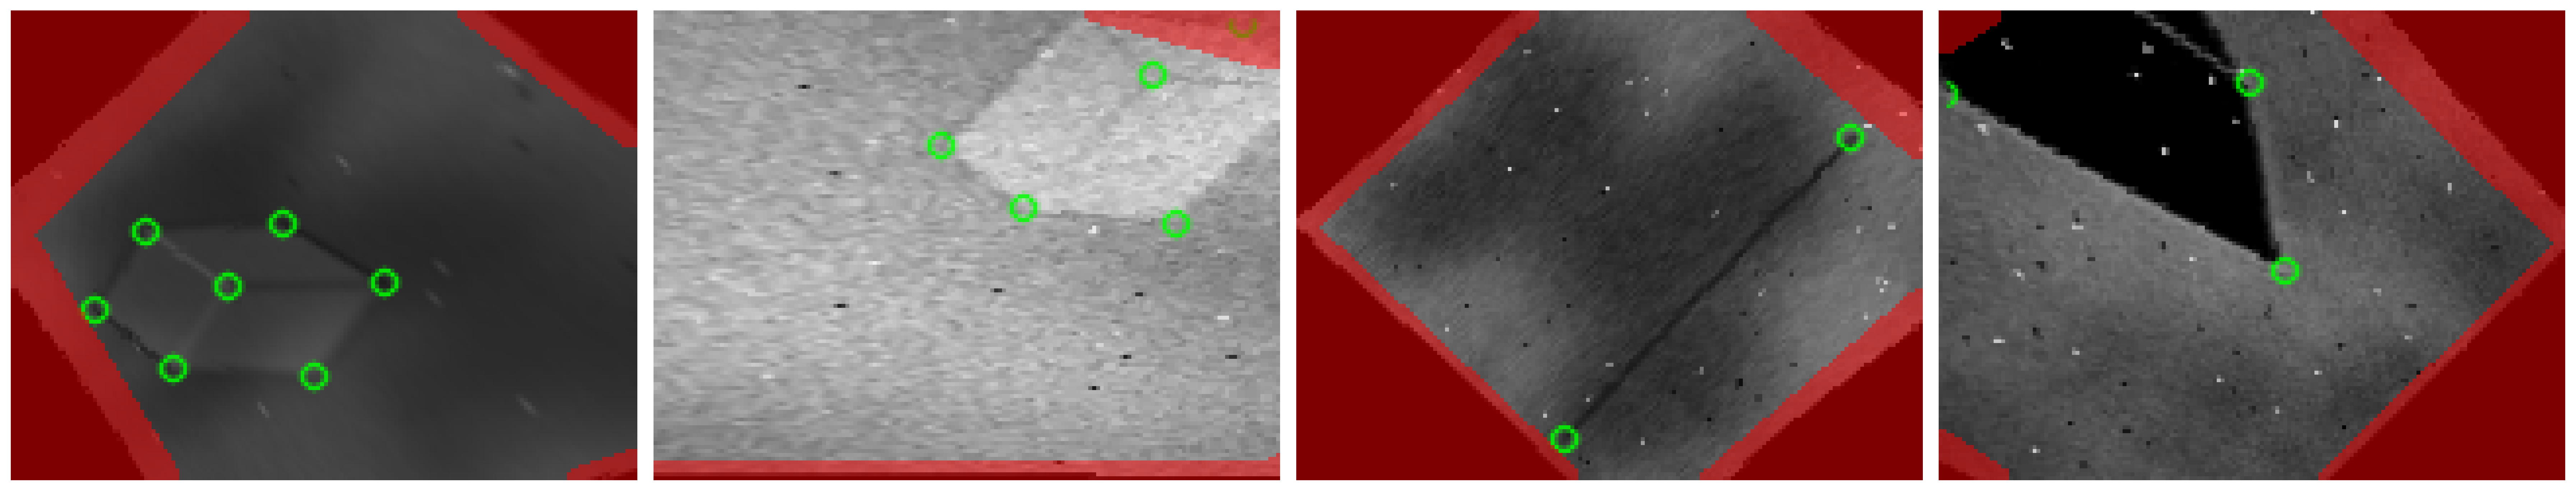

In [14]:
for i in range(8):
    plot_imgs([display(next(data))/255. for _ in range(4)], dpi=300)

# Valid masks due to the bordering artifacts

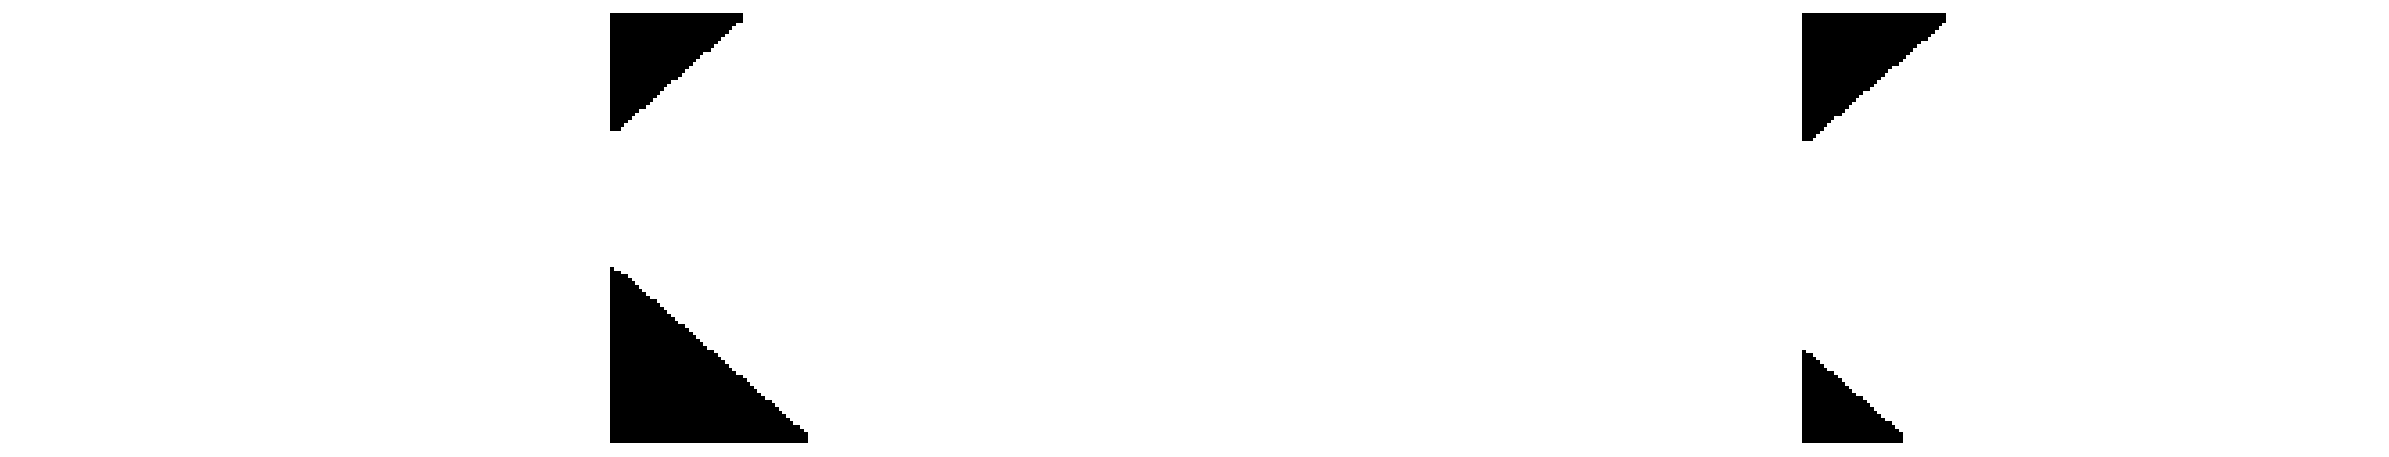

In [10]:
plot_imgs([next(data)['valid_mask'] for _ in range(4)], cmap='gray')

# Without homographic warps

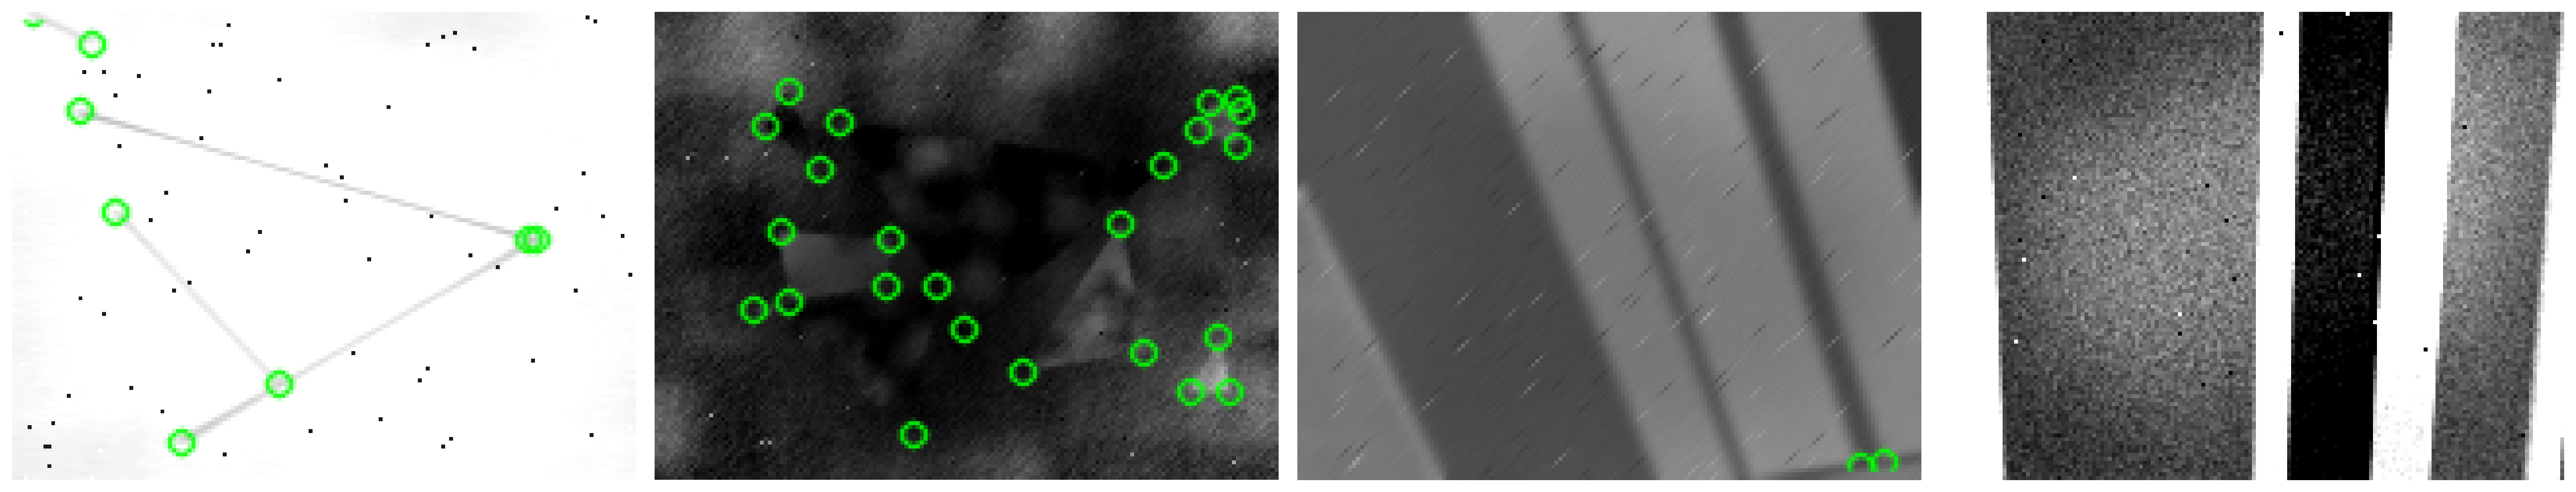

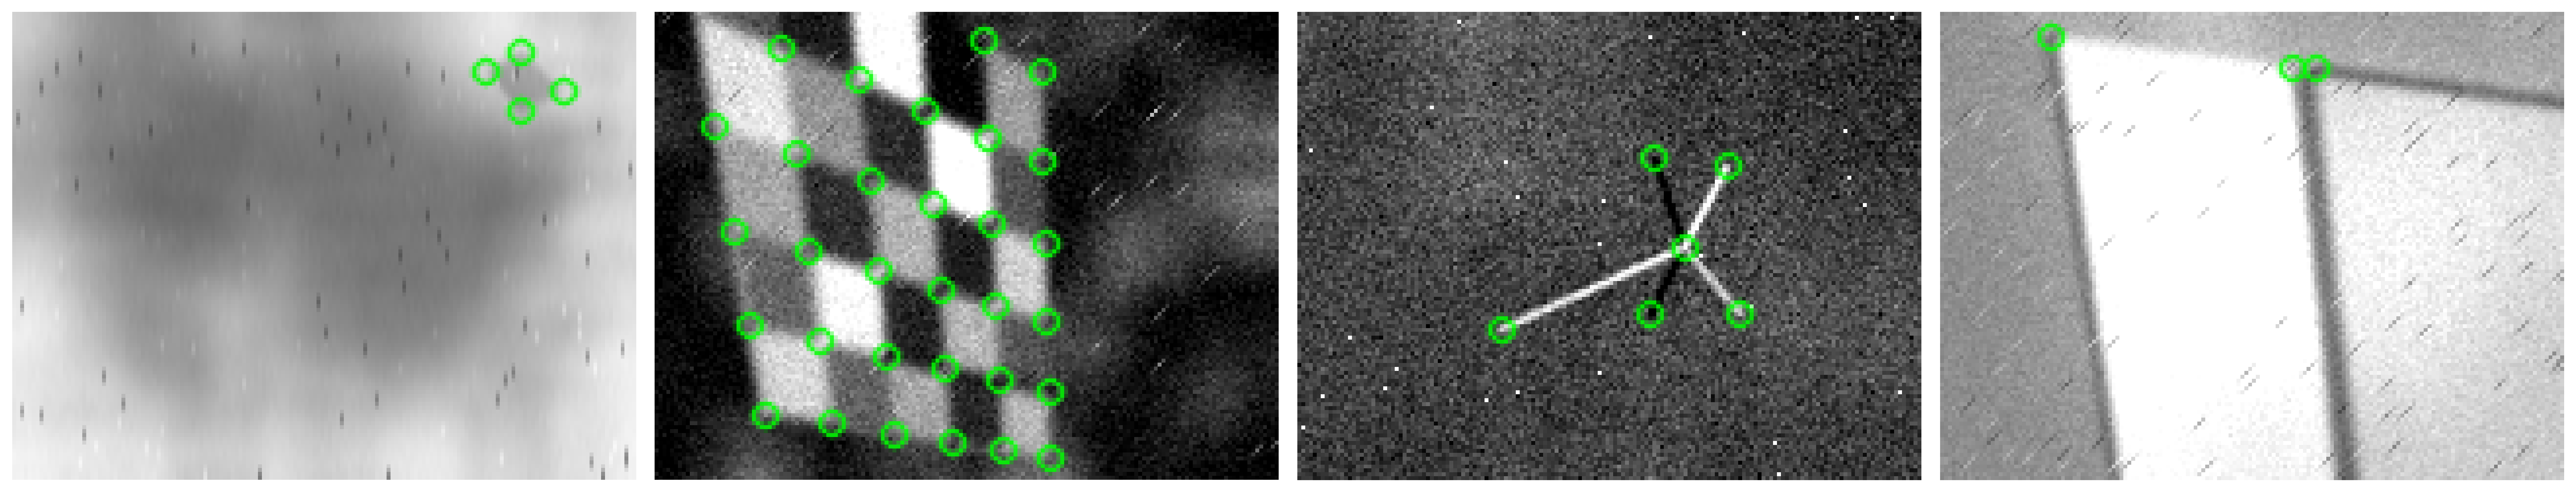

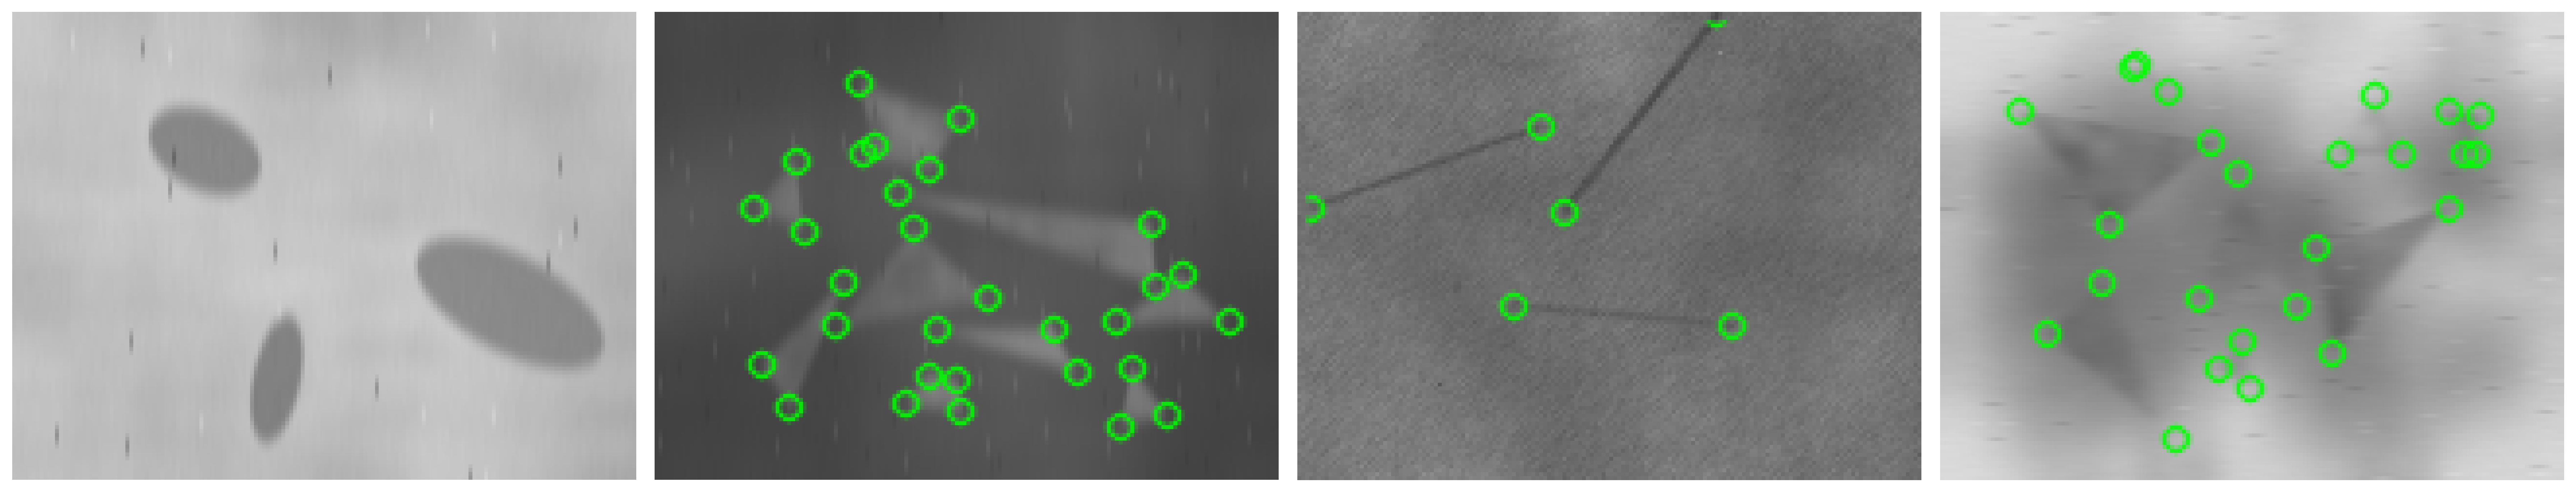

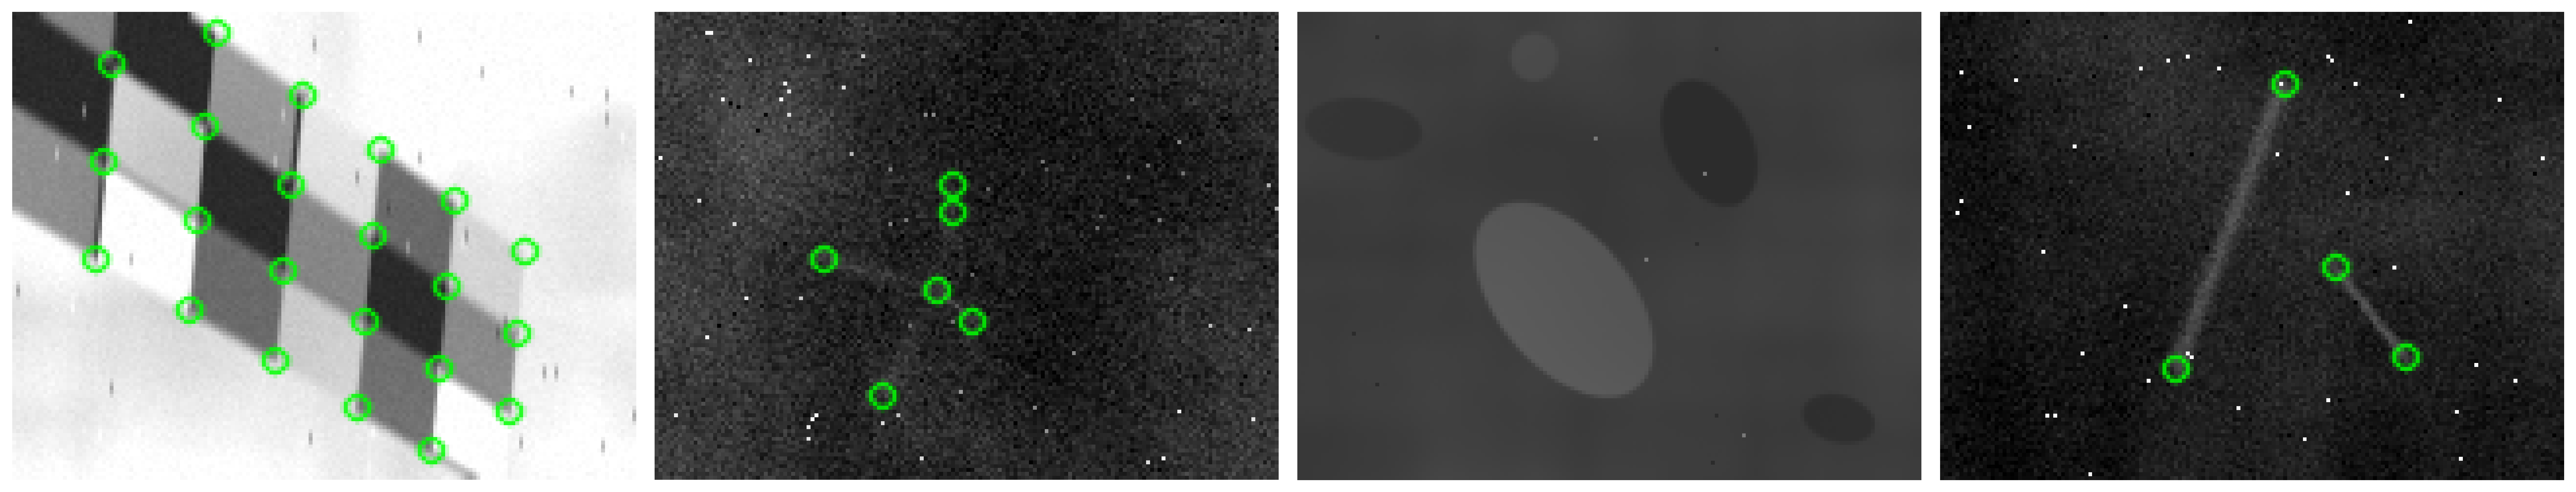

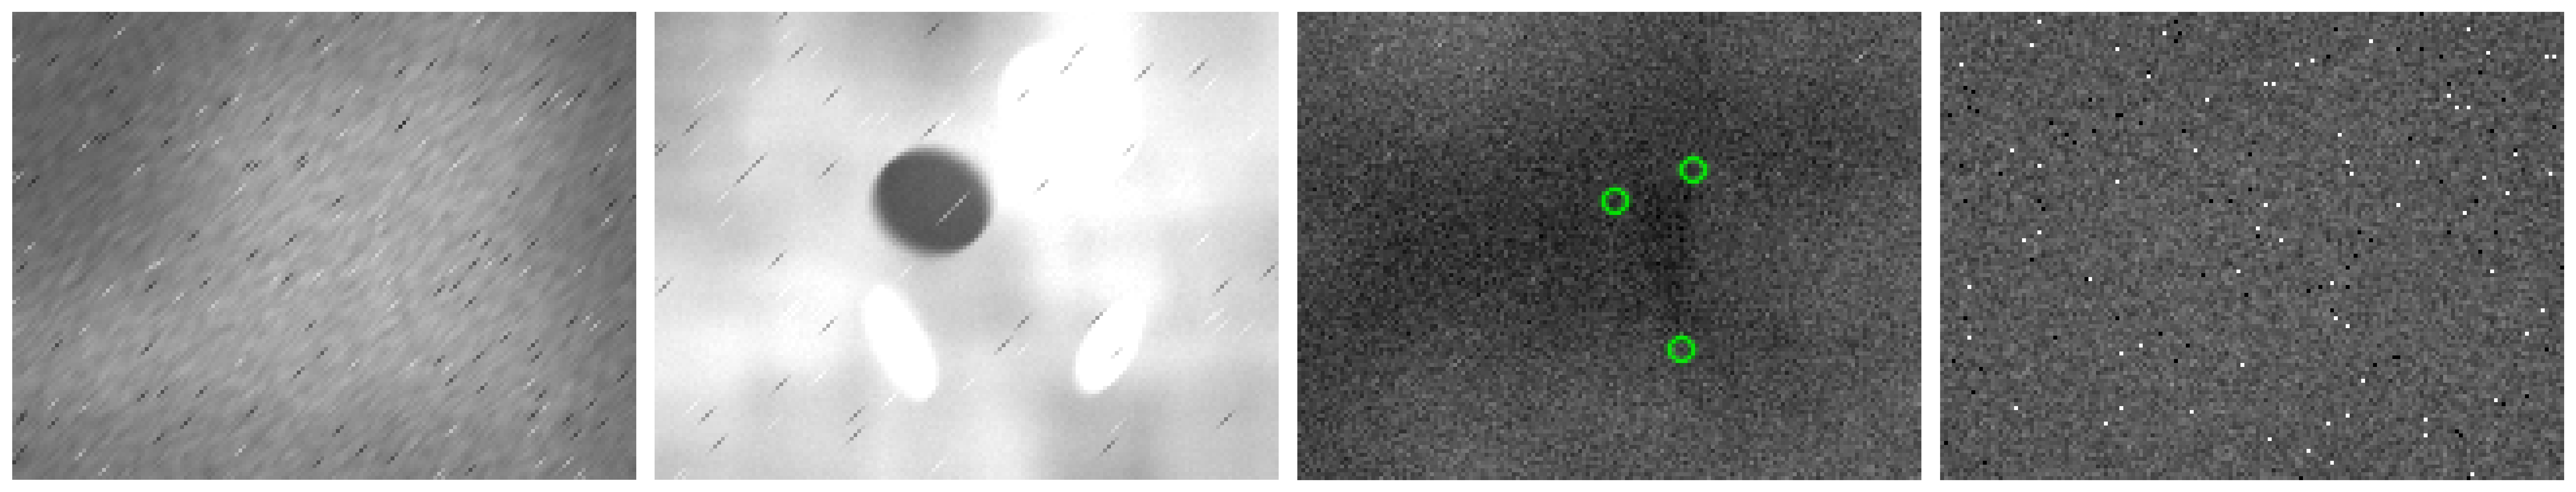

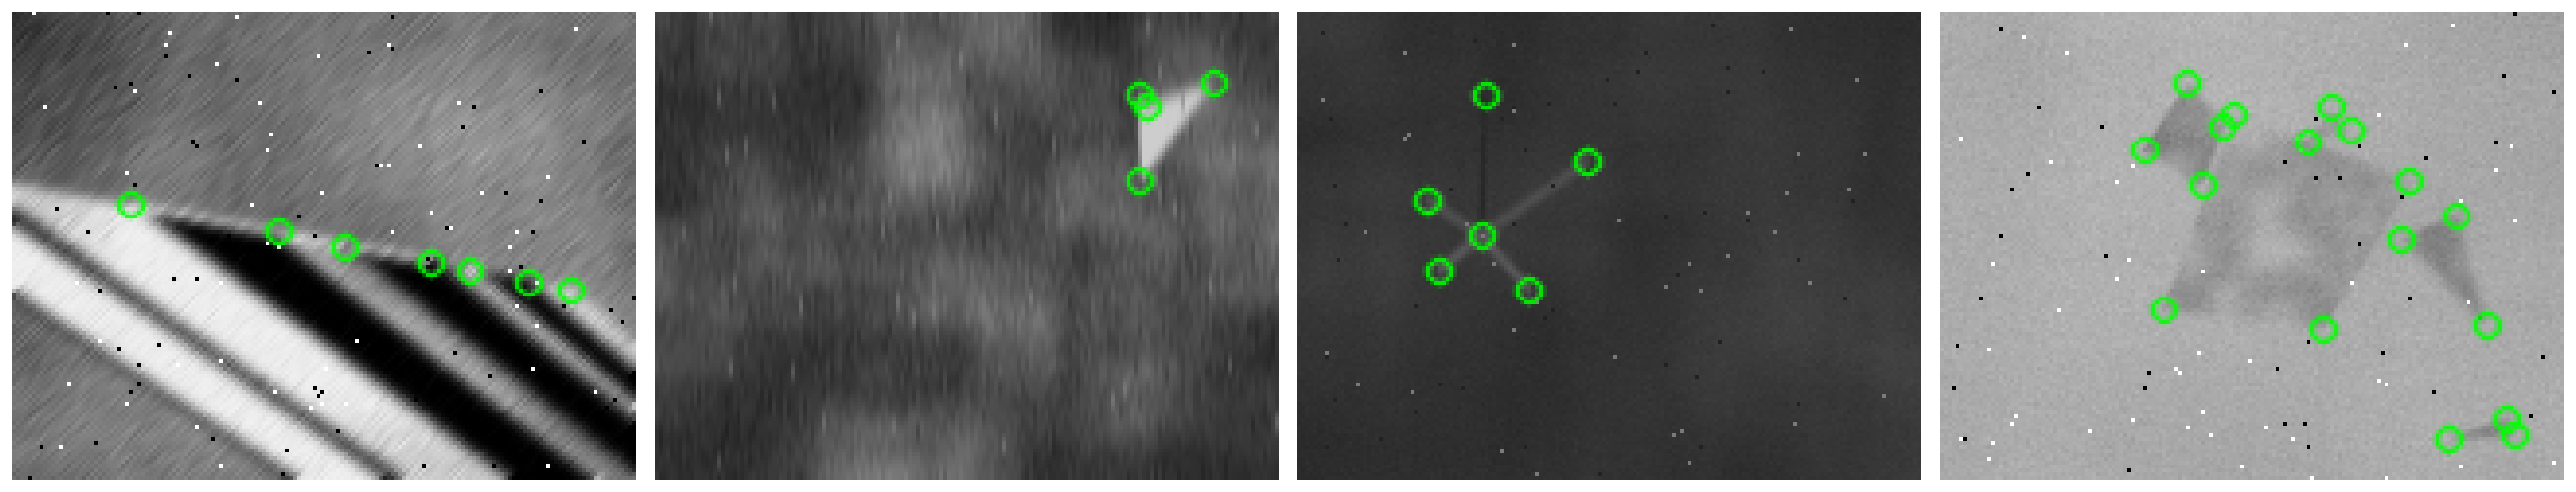

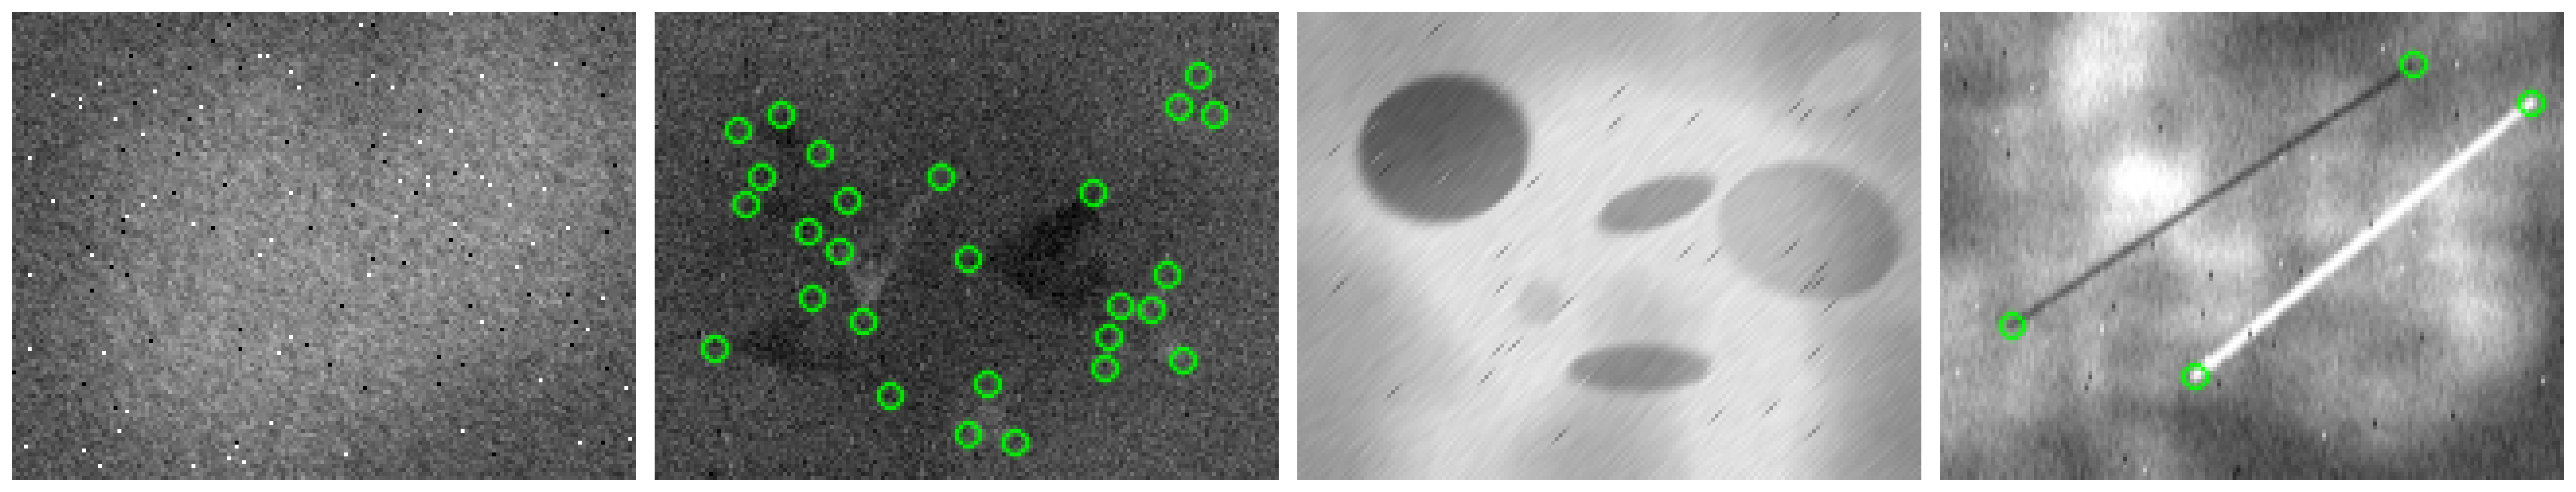

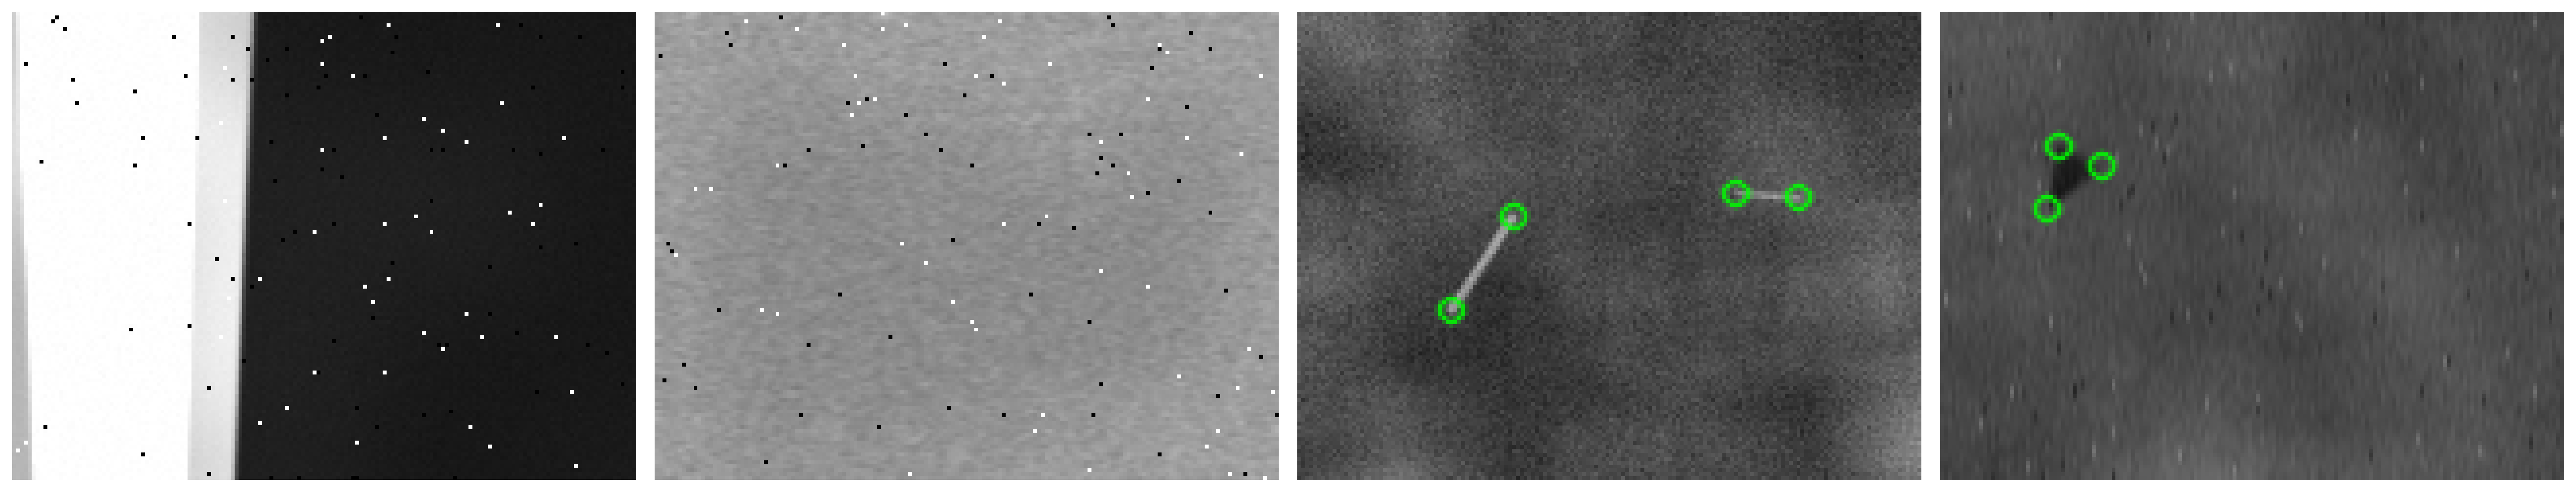